In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

Normalizando os dados

In [9]:
df = pd.read_csv("/Users/usuario/Documentos/riot_project_ds/learning/Arthur_lanches_games_CSVs/Arthur_lanches_matches_final.csv")
df.head()

,matchId,queueId,gameDuration,gameStartTimestamp,summonerName,teamId,championName,kills,deaths,assists,...,firstBloodKill,champExperience,doubleKills,tripleKills,quadraKills,pentaKills,win,gameDurationMin,gameStartTime,gameStartTimeFormatted
0,BR1_3053925806,420,1779,1737003925590,Arthur Lanches,200,Teemo,7,2,5,...,False,17474,1,1,0,0,True,29.6,2025-01-16 05:05:25.590,2025-01-16 05:05:25
1,BR1_3053918853,420,1151,1737001743610,Arthur Lanches,100,Teemo,4,2,3,...,False,10701,0,0,0,0,True,19.2,2025-01-16 04:29:03.610,2025-01-16 04:29:03
2,BR1_3053908851,420,1700,1736999224606,Arthur Lanches,100,Teemo,4,5,3,...,False,12395,0,0,0,0,False,28.3,2025-01-16 03:47:04.606,2025-01-16 03:47:04
3,BR1_3053895020,420,1109,1736996740230,Arthur Lanches,100,Teemo,4,0,1,...,False,10635,0,0,0,0,True,18.5,2025-01-16 03:05:40.230,2025-01-16 03:05:40
4,BR1_3053790675,420,1291,1736985807071,Arthur Lanches,200,Teemo,2,1,4,...,False,13011,0,0,0,0,True,21.5,2025-01-16 00:03:27.071,2025-01-16 00:03:27


Ordenando o DataFrame a partir das datas dos jogos

In [16]:
df = df.sort_values(by='gameStartTimestamp', ascending=False)

In [17]:
df['dataAjust'] = pd.to_datetime(df['gameStartTimeFormatted'])
limit = pd.to_datetime('2025-01-09 04:00:00')
limit

Timestamp('2025-01-09 04:00:00')

In [22]:
df = df[df['dataAjust'] >= limit].reset_index(drop=True)

In [23]:
df.head()

,matchId,queueId,gameDuration,gameStartTimestamp,summonerName,teamId,championName,kills,deaths,assists,kda,totalMinionsKilled,totalDamageTaken,totalDamageDealtToChampions,goldEarned,visionScore,summoner1Id,summoner2Id,firstTowerKill,firstBloodAssist,firstBloodKill,champExperience,doubleKills,tripleKills,quadraKills,pentaKills,win,gameDurationMin,gameStartTime,gameStartTimeFormatted,dataAjust
0,BR1_3066283114,420,1696,1739480566908,NaN,100,Teemo,6,7,9,2.14,191,23235,35433,11604,12,4,14,False,False,False,15186,1,0,0,0,False,28.3,2025-02-13 21:02:46.908,2025-02-13 21:02:46,2025-02-13 21:02:46
1,BR1_3066260304,420,1484,1739476441545,NaN,100,Teemo,6,2,8,7.00,168,13447,20489,10445,13,4,14,False,False,False,15123,0,0,0,0,True,24.7,2025-02-13 19:54:01.545,2025-02-13 19:54:01,2025-02-13 19:54:01
2,BR1_3066246152,420,1969,1739473693973,NaN,100,Teemo,5,4,11,4.00,188,21229,24675,13007,23,4,14,False,True,False,16909,0,0,0,0,True,32.8,2025-02-13 19:08:13.973,2025-02-13 19:08:13,2025-02-13 19:08:13
3,BR1_3066231574,420,1409,1739471039796,NaN,200,Teemo,0,5,5,1.00,208,20639,16903,8170,10,4,14,False,False,False,12355,0,0,0,0,False,23.5,2025-02-13 18:23:59.796,2025-02-13 18:23:59,2025-02-13 18:23:59
4,BR1_3065897622,420,1760,1739385903944,NaN,100,Teemo,3,8,7,1.25,158,23994,28200,9403,15,4,14,False,False,False,12672,0,0,0,0,False,29.3,2025-02-12 18:45:03.944,2025-02-12 18:45:03,2025-02-12 18:45:03


In [24]:
#na Api da riot, ela disponibiliza os dados de teamid com valores de 100 e 200
#100 - time azul, 200 - time vermelho, por isso estou passando para  0 e 1 
df['teamId'] = df['teamId'].map({100: 0, 200 : 1})

In [30]:
df.columns

Index(['matchId', 'queueId', 'gameDuration', 'gameStartTimestamp',
       'summonerName', 'teamId', 'championName', 'kills', 'deaths', 'assists',
       'kda', 'totalMinionsKilled', 'totalDamageTaken',
       'totalDamageDealtToChampions', 'goldEarned', 'visionScore',
       'summoner1Id', 'summoner2Id', 'firstTowerKill', 'firstBloodAssist',
       'firstBloodKill', 'champExperience', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'win', 'gameDurationMin', 'gameStartTime',
       'gameStartTimeFormatted', 'dataAjust'],
      dtype='object')

Agora que tenho o df ordenado por datas, a única coisa que é mais importante
em relação ao tempo é o tempo de partida
Vou dropar colunas que considero não serem importantes para análise e futuramente para o modelo

In [31]:
df = df.drop(columns=['gameStartTimestamp', 'gameStartTimeFormatted', 'dataAjust'])

In [34]:
color_palette = ['#6CE098', '#74E136', '#E06C9D', '#614F57', '#4F6156', '#56614F']
# Definindo a paleta de cores no SNS
sns.set_palette(sns.color_palette(color_palette))
# Mostrando a paleta de cores
sns.color_palette(color_palette)

[(0.4235294117647059, 0.8784313725490196, 0.596078431372549),
 (0.4549019607843137, 0.8823529411764706, 0.21176470588235294),
 (0.8784313725490196, 0.4235294117647059, 0.615686274509804),
 (0.3803921568627451, 0.30980392156862746, 0.3411764705882353),
 (0.30980392156862746, 0.3803921568627451, 0.33725490196078434),
 (0.33725490196078434, 0.3803921568627451, 0.30980392156862746)]

# EDA

Primeiro vamos definir o que cada coluna tem de informação

- **matchId** → Refere-se ao ID da partida.  
- **queueId** → Refere-se ao tipo de fila da partida (Solo/Duo, Flex, URF, etc.).  
  - Exemplo: `420` é Ranked Solo/Duo.  
- **gameDuration** → Tempo da partida
- **summonerName** → Nick do jogador
- **teamId** → Lado que o jogador jogou aquela partida
  - Exemplo: `0` é Azul e `1` é Vermelho
- **championName** → Nome do campeão jogado
- **kills-death-assists e kda** → Colunas respectivamente direcionadas aos abates, mortes e assistências do jogador, kda refere-se a → kda = `(kills + assists)/deaths`
- **totalMinionsKilled** → Total de tropas abatidas
- **totalDamageTaken** → Total de dano recebido
- **totalDamageDealtToChampions** → Dano causado em campeões
- **goldEarned** → Ouro recebido
- **visionScore** → Pontuação de visão
- **summonerId** → Feitiço de invocador utilizado.
  - Exemplo : 
    - **14** → Flash
    - **21** → Barrier
    - **32** → Cleanse
    - **39** → Heal
    - **49** → Smite
    - **54** → Teleport
    - **55** → Clarity

- **firstTowerKill** → Dados se o jogador foi responsável por derrubar a primeira torre
- **firstBloodAssist** → Assistência no primeiro abate
- **firstBloodKill** → Causou o primeiro abate
- **champExperience** → Experiência obtida durante a partida
- **Double-Triple-Quadra-Penta** → Número de vezes e qual quantidade de abates o jogador pegou em sequência
- **gameDurationMin** → Tempo de duração da partida em minutos 
- **win** → `0` se o jogador perdeu a partida, `1` se o jogador ganhou a partida

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      200 non-null    object 
 1   queueId                      200 non-null    int64  
 2   gameDuration                 200 non-null    int64  
 3   summonerName                 160 non-null    object 
 4   teamId                       200 non-null    int64  
 5   championName                 200 non-null    object 
 6   kills                        200 non-null    int64  
 7   deaths                       200 non-null    int64  
 8   assists                      200 non-null    int64  
 9   kda                          200 non-null    float64
 10  totalMinionsKilled           200 non-null    int64  
 11  totalDamageTaken             200 non-null    int64  
 12  totalDamageDealtToChampions  200 non-null    int64  
 13  goldEarned          

De colunas com dados categóricos com dados não únicos e importantes temos apenas "championName".

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
queueId,200.0,420.00000,0.000000,420.0,420.00,420.0,420.000,420.0
gameDuration,200.0,1666.77000,452.262472,559.0,1414.50,1651.0,1916.250,3628.0
teamId,200.0,0.49500,0.501230,0.0,0.00,0.0,1.000,1.0
kills,200.0,5.60000,3.440813,0.0,3.00,5.0,8.000,18.0
deaths,200.0,3.43000,2.440261,0.0,2.00,3.0,5.000,13.0
assists,200.0,6.96000,4.827517,0.0,3.00,6.0,9.000,24.0
kda,200.0,5.15975,4.368189,0.0,2.23,4.0,7.000,25.0
totalMinionsKilled,200.0,189.85500,56.053940,8.0,161.75,195.0,220.250,395.0
totalDamageTaken,200.0,19733.00000,10906.197149,3064.0,12521.75,18115.0,24708.750,83843.0
totalDamageDealtToChampions,200.0,26198.30500,14870.823452,3939.0,16228.75,23432.5,33390.000,99908.0


In [42]:
df['summonerName'] = df['summonerName'].fillna('Arthur Lanches')

In [43]:
df.isna().sum()

matchId                        0
queueId                        0
gameDuration                   0
summonerName                   0
teamId                         0
championName                   0
kills                          0
deaths                         0
assists                        0
kda                            0
totalMinionsKilled             0
totalDamageTaken               0
totalDamageDealtToChampions    0
goldEarned                     0
visionScore                    0
summoner1Id                    0
summoner2Id                    0
firstTowerKill                 0
firstBloodAssist               0
firstBloodKill                 0
champExperience                0
doubleKills                    0
tripleKills                    0
quadraKills                    0
pentaKills                     0
win                            0
gameDurationMin                0
gameStartTime                  0
dtype: int64

Plotando a coluna de vitorias

win
True     125
False     75
Name: count, dtype: int64

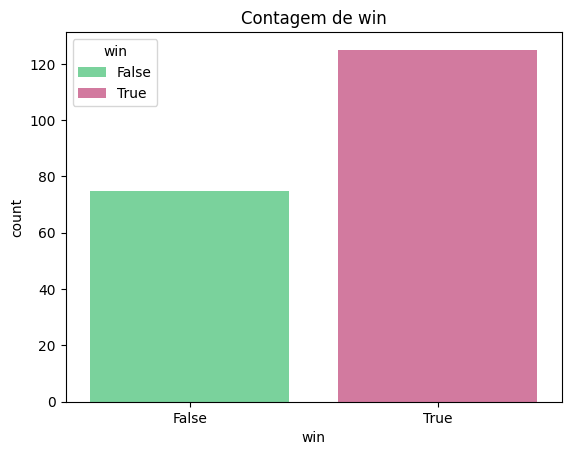

In [45]:
custom_palette = {0: color_palette[0], 1: color_palette[2]}

sns.countplot(data=df, x='win', hue='win', palette=custom_palette).set(title='Contagem de win')
df['win'].value_counts()

Plotando todas as features numericas para vizualizar melhor como os dados estão

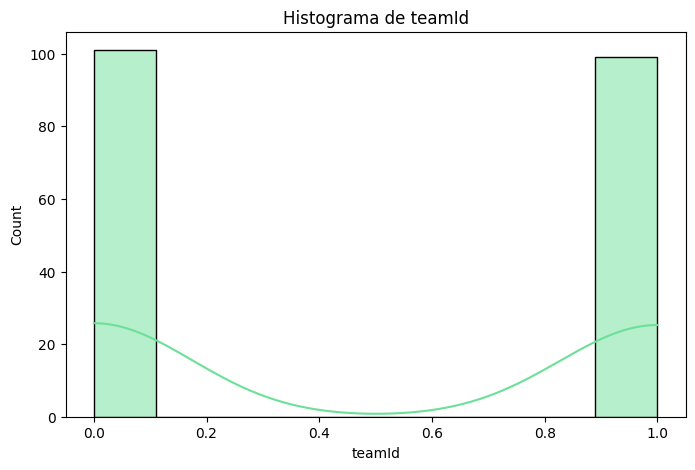

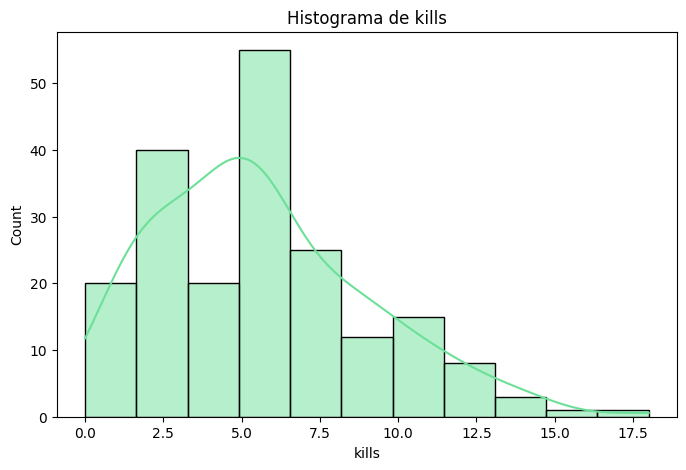

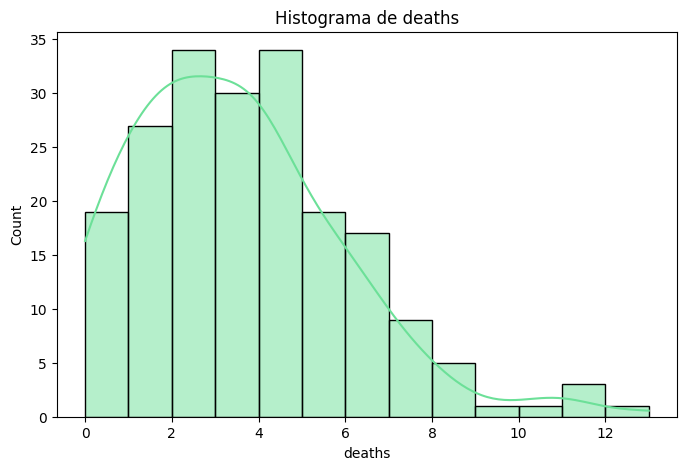

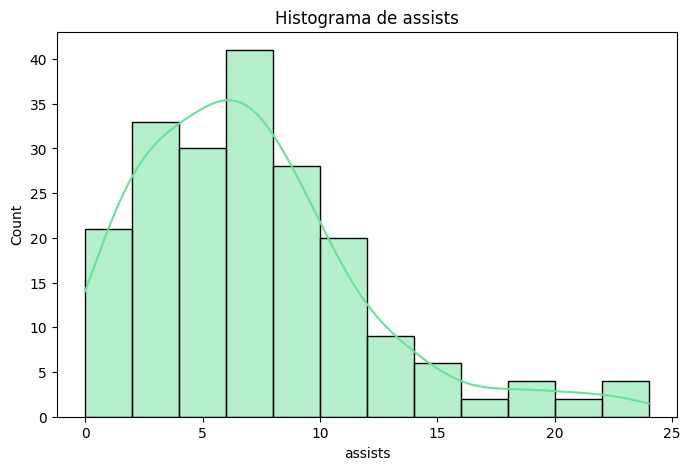

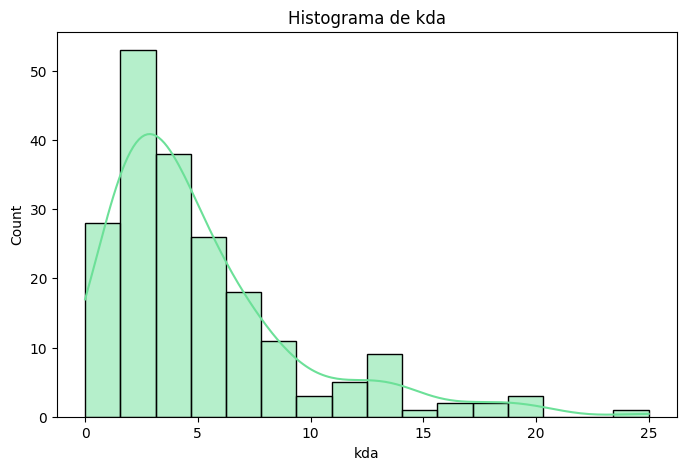

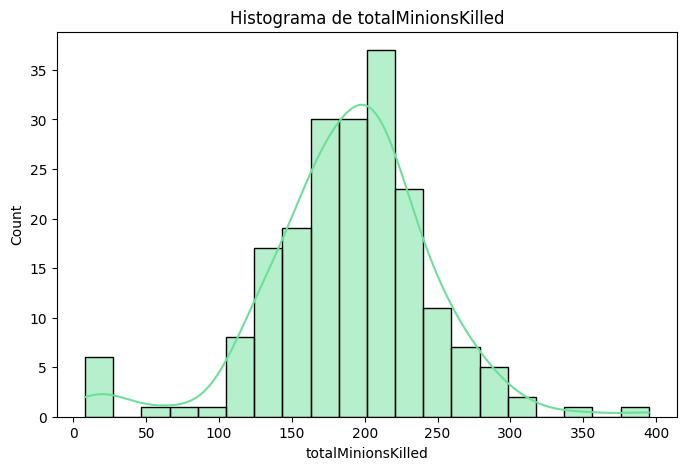

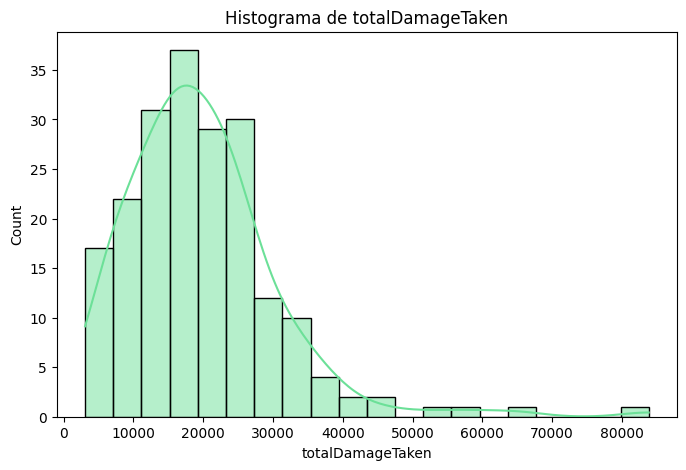

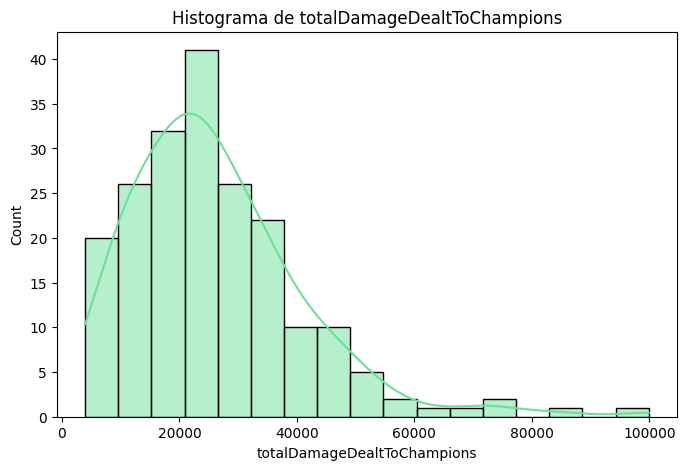

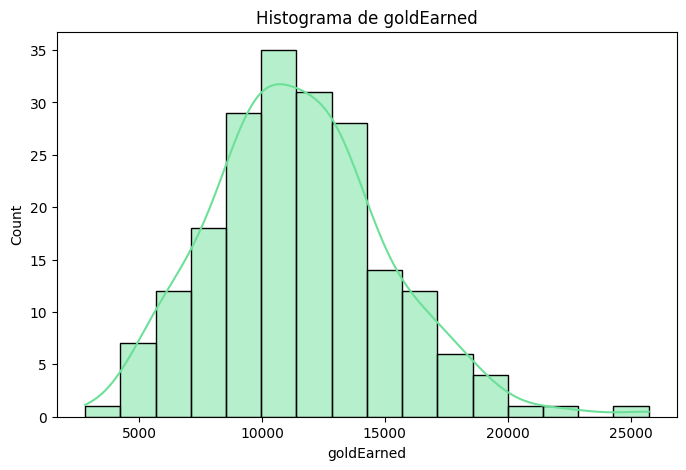

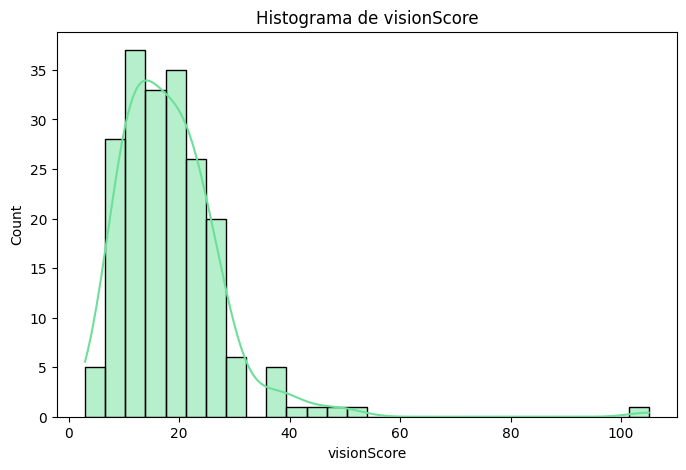

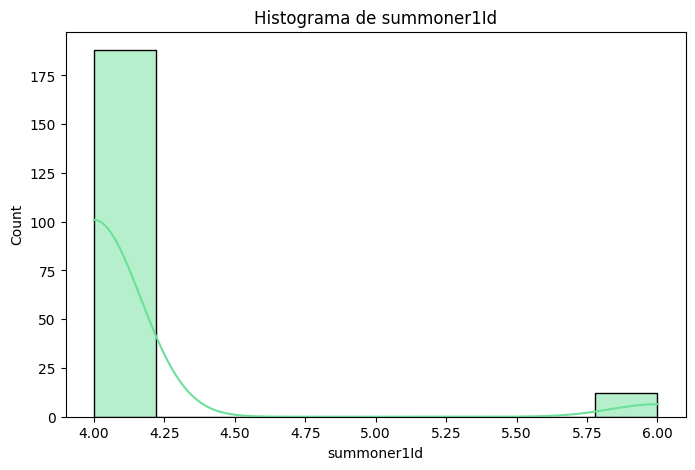

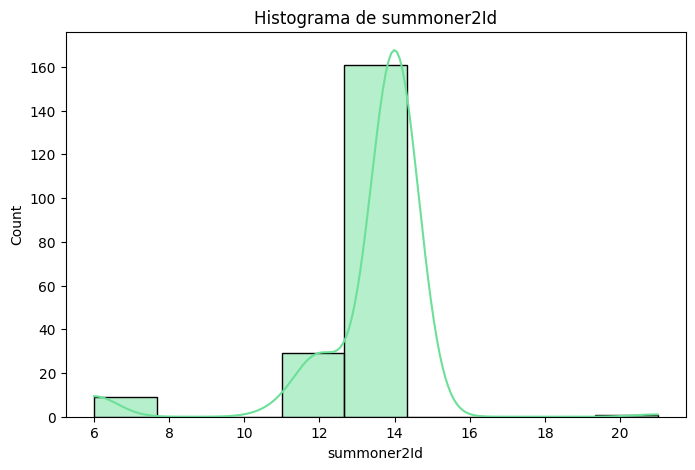

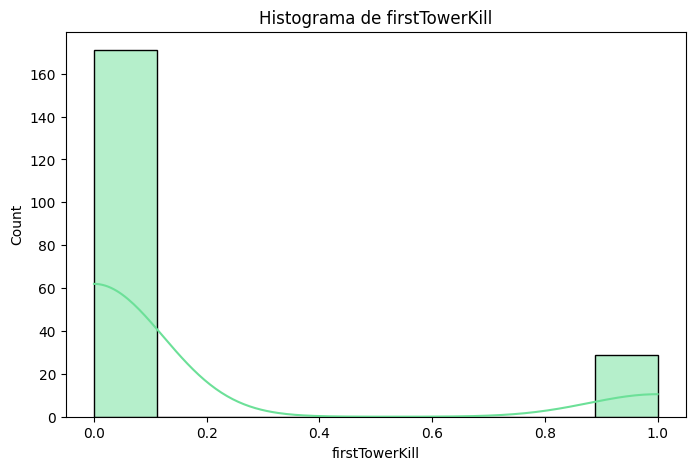

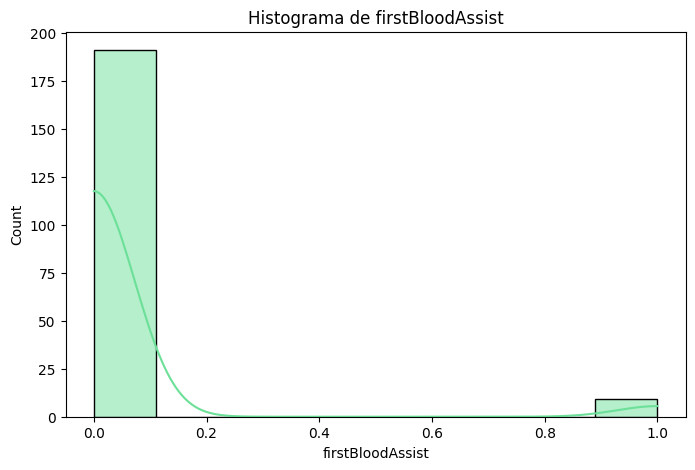

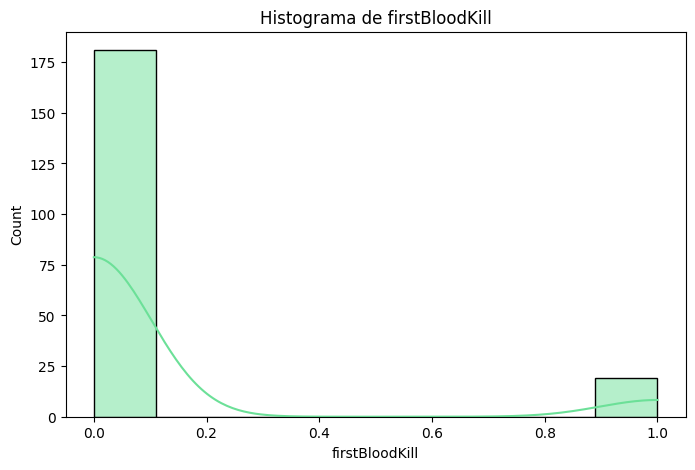

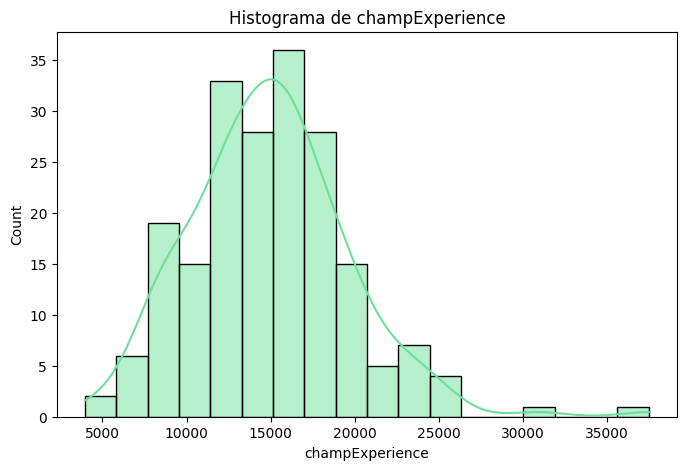

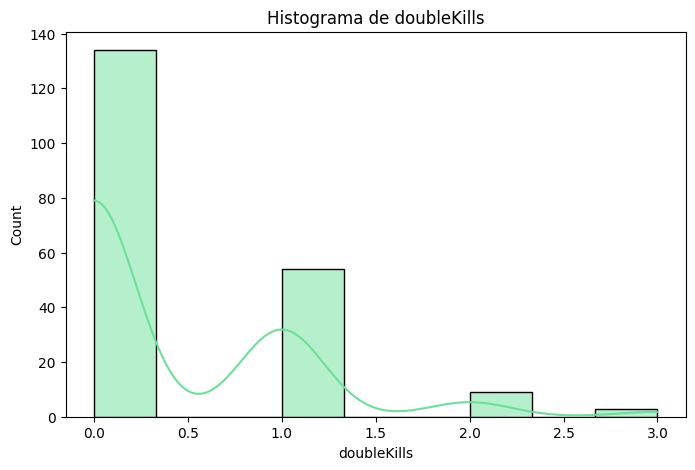

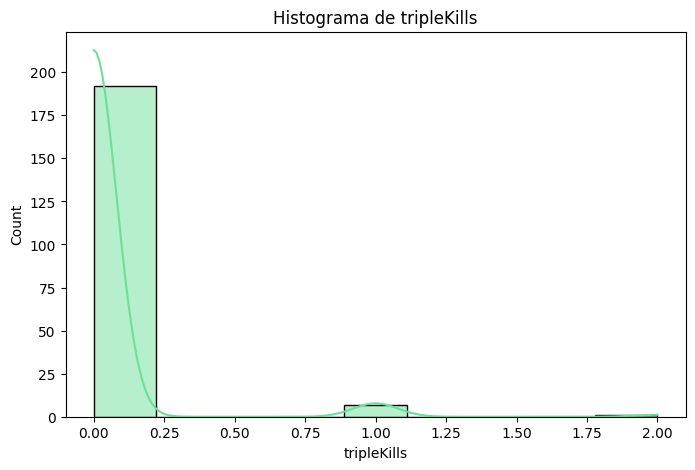

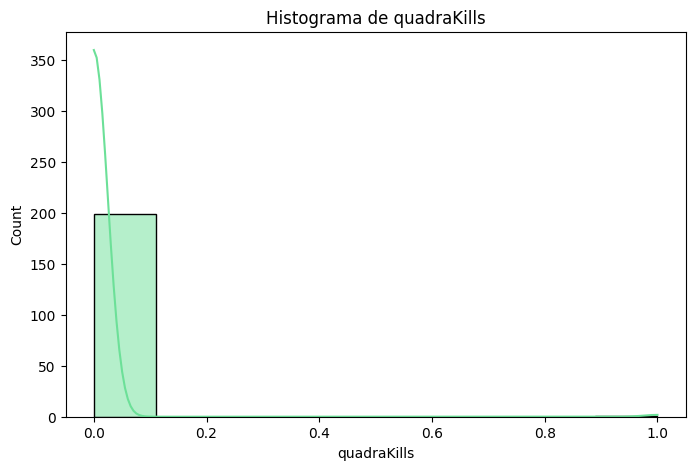

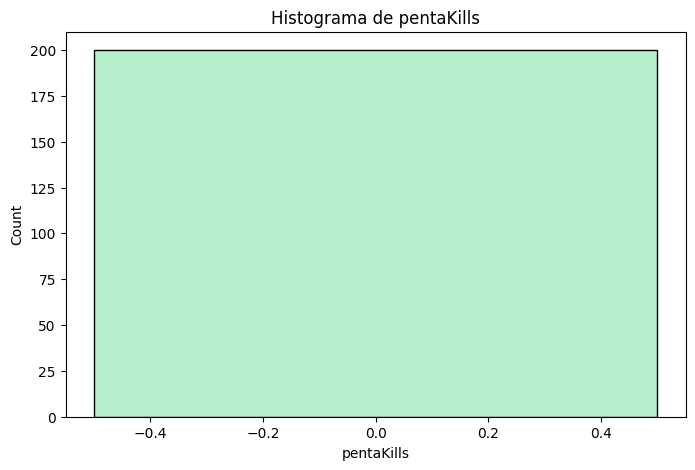

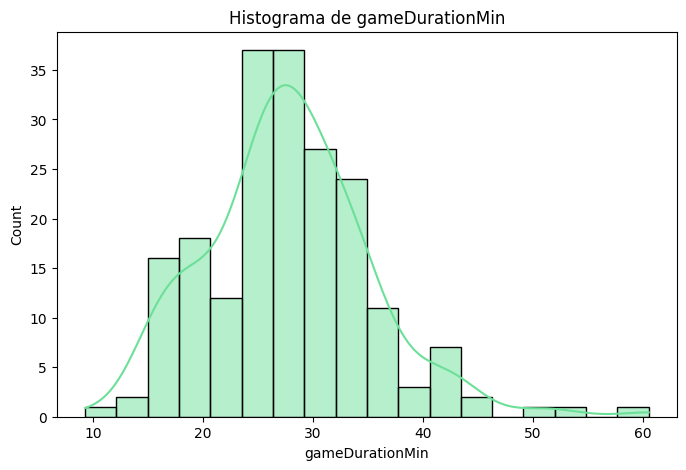

In [47]:
features_num = ['teamId', 'kills', 'deaths', 'assists',
       'kda', 'totalMinionsKilled', 'totalDamageTaken','totalDamageDealtToChampions', 'goldEarned', 'visionScore','summoner1Id', 'summoner2Id', 'firstTowerKill', 'firstBloodAssist',
       'firstBloodKill', 'champExperience', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'gameDurationMin']
for feature in features_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True).set(title=f'Histograma de {feature}')
    plt.show()

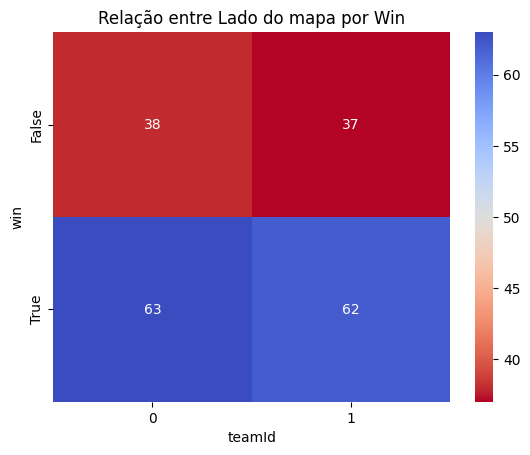

In [59]:
# criando uma matriz de contagem
heatmap_data = pd.crosstab(df['win'], df['teamId'])

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm_r', fmt="d")
plt.title('Relação entre Lado do mapa por Win')
plt.xlabel('teamId')
plt.ylabel('win')
plt.show()


Os dados parecem bem distribuidos, da mesma forma que perde, o jogador ganha em ambos os lados